<a href="https://colab.research.google.com/github/comparativechrono/computational_biology_notebooks/blob/main/supervision_resources/Linear_vs_mixed_models_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 — Fertiliser × Field (random intercept LMM)

            Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   height_cm
No. Observations:   36        Method:               REML     
No. Groups:         12        Scale:                3.1137   
Min. group size:    3         Log-Likelihood:       -87.6927 
Max. group size:    3         Converged:            Yes      
Mean group size:    3.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          88.882    1.621 54.841 0.000 85.706 92.059
C(fertiliser)[T.B]  3.733    0.720  5.183 0.000  2.322  5.145
C(fertiliser)[T.C]  6.976    0.720  9.684 0.000  5.564  8.388
field_id Var       28.408    8.715                           



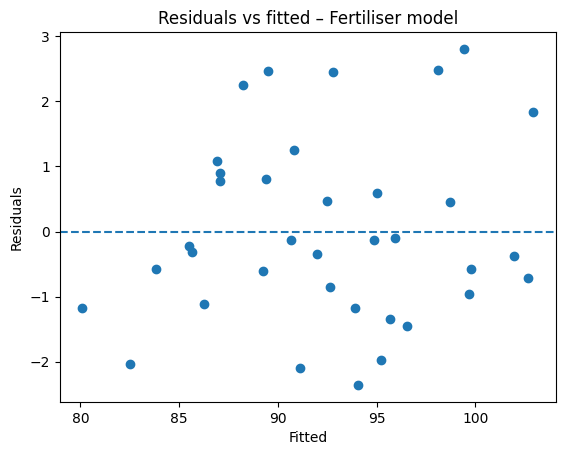

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ------------- Toy data (36 rows) -------------
np.random.seed(1)
fields       = np.repeat(np.arange(12), 3)
fertilisers  = np.tile(['A', 'B', 'C'], 12)
field_eff    = np.random.normal(0, 4, size=12)[fields]          # random intercepts
treatment_eff = {'A': 0, 'B': 3, 'C': 6}
heights      = 90 + field_eff + pd.Series(fertilisers).map(treatment_eff) \
               + np.random.normal(0, 2, size=36)
wheat = pd.DataFrame({'height_cm': heights,
                      'fertiliser': fertilisers,
                      'field_id': fields})

# ------------- Model -------------
md = smf.mixedlm("height_cm ~ C(fertiliser)", wheat,
                 groups="field_id")
m1 = md.fit(method='lbfgs')
print(m1.summary())

# ------------- Quick diagnostics -------------
resid  = m1.resid
fitted = m1.fittedvalues
plt.scatter(fitted, resid)
plt.axhline(0, ls='--'); plt.xlabel("Fitted"); plt.ylabel("Residuals")
plt.title("Residuals vs fitted – Fertiliser model")
plt.show()


### 2 — Body-mass vs Glucose (simple OLS)

                            OLS Regression Results                            
Dep. Variable:           glucose_mmol   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     132.8
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           7.53e-24
Time:                        21:38:26   Log-Likelihood:                -146.19
No. Observations:                 200   AIC:                             296.4
Df Residuals:                     198   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6072      0.170     33.069      0.0

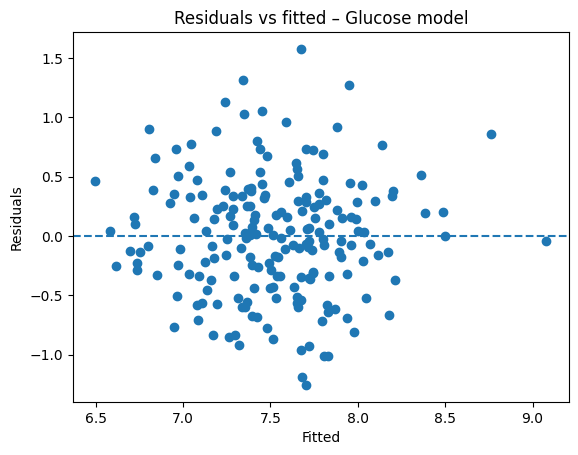

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ------------- Toy data (200 mice) -------------
np.random.seed(2)
mass  = np.random.normal(25, 5, 200)          # g
gluc  = 5.5 + 0.08*mass + np.random.normal(0, .5, 200)
mice  = pd.DataFrame({'mass_g': mass,
                      'glucose_mmol': gluc})

# ------------- Model -------------
lm = smf.ols("glucose_mmol ~ mass_g", mice).fit()
print(lm.summary())

# ------------- Quick diagnostics -------------
plt.scatter(lm.fittedvalues, lm.resid)
plt.axhline(0, ls='--'); plt.xlabel("Fitted"); plt.ylabel("Residuals")
plt.title("Residuals vs fitted – Glucose model")
plt.show()


### 3 — Tumour growth (random intercept + slope LMM)

                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       volume_mm3
No. Observations:       240           Method:                   REML      
No. Groups:             40            Scale:                    222.3669  
Min. group size:        6             Log-Likelihood:           -1054.7296
Max. group size:        6             Converged:                Yes       
Mean group size:        6.0                                               
--------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------------
Intercept                    185.058    9.783 18.917 0.000 165.885 204.232
C(treatment)[T.Control]        7.648   13.835  0.553 0.580 -19.468  34.763
C(treatment)[T.DrugX]          9.920   13.835  0.717 0.473 -17.195  37.036
C(treatment)[T.DrugY]          4.083   13.83

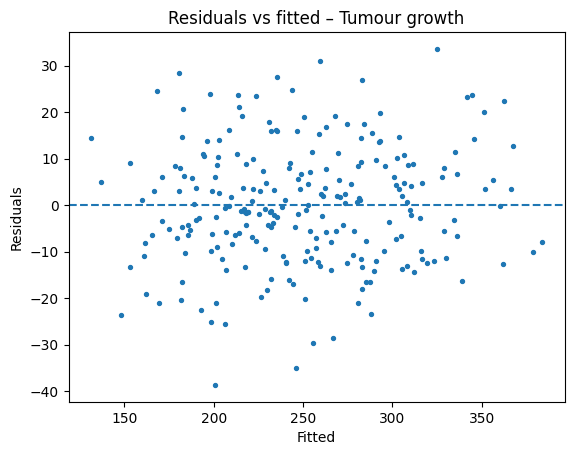

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ------------- Toy data (40 mice × 6 weeks) -------------
np.random.seed(3)
treatments  = np.repeat(['Control','DrugX','DrugY','Combo'], 60)  # 10 mice × 6 obs
mouse_id    = np.repeat(np.arange(40), 6)
week        = np.tile(np.arange(6), 40)

base        = np.random.normal(200, 30, 40)[mouse_id]        # random intercepts
slope_mouse = np.random.normal(25, 5, 40)[mouse_id]          # random slopes
drug_eff    = {'Control':0, 'DrugX':-4, 'DrugY':-6, 'Combo':-10}
combo_slow  = {'Control':0, 'DrugX':-1, 'DrugY':-2, 'Combo':-3}

vol = (base +
       slope_mouse*week +
       pd.Series(treatments).map(drug_eff) +
       pd.Series(treatments).map(combo_slow)*week +
       np.random.normal(0, 15, len(week)))

tumour = pd.DataFrame({'volume_mm3': vol,
                       'week': week,
                       'treatment': treatments,
                       'mouse_id': mouse_id})

# ------------- Model -------------
md = smf.mixedlm("volume_mm3 ~ week * C(treatment)", tumour,
                 groups="mouse_id",
                 re_formula="~week")
m3 = md.fit(method='lbfgs')
print(m3.summary())

# ------------- Quick diagnostics -------------
plt.scatter(m3.fittedvalues, m3.resid, s=8)
plt.axhline(0, ls='--'); plt.xlabel("Fitted"); plt.ylabel("Residuals")
plt.title("Residuals vs fitted – Tumour growth")
plt.show()


### 4 — qPCR dose–response with plate effect (random intercept LMM)

         Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: Ct      
No. Observations:   144     Method:             REML    
No. Groups:         8       Scale:              0.1540  
Min. group size:    18      Log-Likelihood:     -89.0717
Max. group size:    18      Converged:          Yes     
Mean group size:    18.0                                
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    21.884    0.181 121.153 0.000 21.530 22.238
dose          0.040    0.001  42.963 0.000  0.038  0.042
plate_id Var  0.246    0.355                            



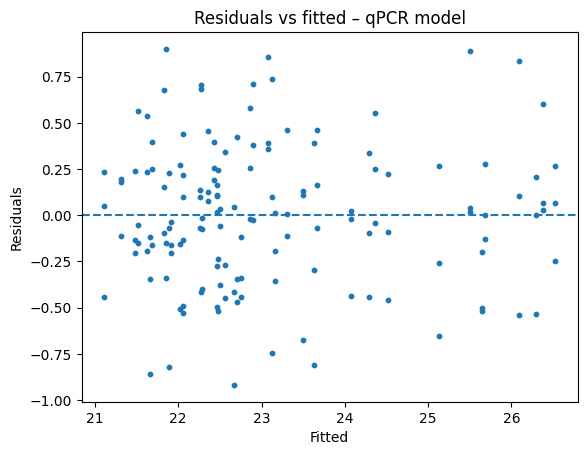

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# ------------- Toy data (8 plates × 6 doses × 3 reps) -------------
np.random.seed(4)
plate_id = np.repeat(np.arange(8), 18)                       # 18 wells per plate
dose     = np.tile(np.repeat([0,5,10,20,50,100], 3), 8)      # μM
plate_eff = np.random.normal(0, 0.6, 8)[plate_id]            # random intercepts

# assume Ct rises with log(dose) (lower expression)
Ct = 22 + 0.04*dose + plate_eff + np.random.normal(0, 0.4, len(dose))
qpcr = pd.DataFrame({'Ct': Ct,
                     'dose': dose,
                     'plate_id': plate_id})

# ------------- Model -------------
md = smf.mixedlm("Ct ~ dose", qpcr, groups="plate_id")
m4 = md.fit(method='lbfgs')
print(m4.summary())

# ------------- Quick diagnostics -------------
plt.scatter(m4.fittedvalues, m4.resid, s=10)
plt.axhline(0, ls='--'); plt.xlabel("Fitted"); plt.ylabel("Residuals")
plt.title("Residuals vs fitted – qPCR model")
plt.show()
